### Image Denoising

Previous example: [/examples/autoencoders/convnet.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/convnet.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
Next example: [/examples/autoencoders/vae.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/vae.ipynb)

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same', name='final')(x)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

num_of_dims = np.prod(encoder.output.shape[1:])
print(f'{num_of_dims = }\n')

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Create the decoder model
decoder = keras.Model(inputs=encoder.get_layer('final').output, outputs=autoencoder.output)

print('autoencoder:'); autoencoder.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

num_of_dims = 1568

autoencoder:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 final (MaxPooling2D)        (None, 7, 7, 32)          0         
                                                                 
 conv2d_2 (Conv2

2023-01-01 15:17:45.235850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-01 15:17:45.235940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
print('encoder:'); encoder.summary()

encoder:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 final (MaxPooling2D)        (None, 7, 7, 32)          0         
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
__________________________________________________

In [4]:
print('decoder:'); decoder.summary()

decoder:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7, 7, 32)]        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)    

In [5]:
(x_train, _), (x_test, _) = mnist.load_data() # Labels ignored
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(f'{x_train.shape = }')
print(f'{x_test.shape = }')
print(f'{x_train_noisy.shape = }')
print(f'{x_test_noisy.shape = }')

x_train.shape = (60000, 28, 28, 1)
x_test.shape = (10000, 28, 28, 1)
x_train_noisy.shape = (60000, 28, 28, 1)
x_test_noisy.shape = (10000, 28, 28, 1)


In [6]:
autoencoder.fit(x_train_noisy, x_train, epochs=32, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/32


2023-01-01 15:17:46.913561: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-01 15:17:47.131033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2070

2023-01-01 15:17:59.418939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 14s 56ms/step - loss: 0.2070 - val_loss: 0.1273
Epoch 2/32
235/235 [==============================] - 14s 58ms/step - loss: 0.1225 - val_loss: 0.1179
Epoch 3/32
235/235 [==============================] - 13s 55ms/step - loss: 0.1153 - val_loss: 0.1133
Epoch 4/32
235/235 [==============================] - 13s 53ms/step - loss: 0.1111 - val_loss: 0.1090
Epoch 5/32
235/235 [==============================] - 13s 53ms/step - loss: 0.1085 - val_loss: 0.1062
Epoch 6/32
235/235 [==============================] - 13s 54ms/step - loss: 0.1067 - val_loss: 0.1065
Epoch 7/32
235/235 [==============================] - 13s 56ms/step - loss: 0.1053 - val_loss: 0.1037
Epoch 8/32
235/235 [==============================] - 13s 55ms/step - loss: 0.1043 - val_loss: 0.1029
Epoch 9/32
235/235 [==============================] - 13s 55ms/step - loss: 0.1035 - val_loss: 0.1019
Epoch 10/32
235/235 [==============================] - 13s 56ms/step - loss: 0.1028 - val_los

In [7]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy, verbose=0)
decoded_imgs = decoder.predict(encoded_imgs, verbose=0)
print(f'{encoded_imgs.mean() = }')
print(f'{encoded_imgs.std() = }')

2023-01-01 15:24:43.034832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-01 15:24:43.727172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


encoded_imgs.mean() = 0.21739943
encoded_imgs.std() = 0.26438257


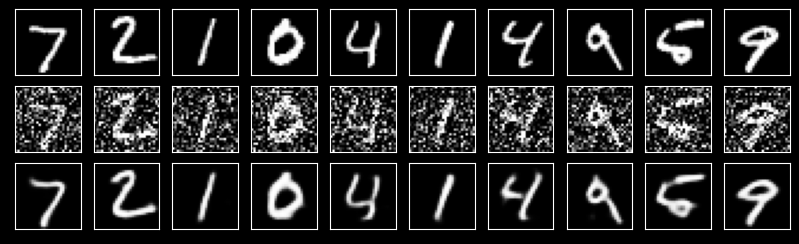

In [10]:
num_of_digits_to_display = 10
plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(hspace=0)
for digit_idx in range(num_of_digits_to_display):
    # Display original
    ax = plt.subplot(3, num_of_digits_to_display, digit_idx + 1)
    plt.imshow(x_test[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy original
    ax = plt.subplot(3, num_of_digits_to_display, digit_idx + 1 + num_of_digits_to_display)
    plt.imshow(x_test_noisy[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, num_of_digits_to_display, digit_idx + 1 + 2 * num_of_digits_to_display)
    plt.imshow(decoded_imgs[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Previous example: [/examples/autoencoders/convnet.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/convnet.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
Next example: [/examples/autoencoders/vae.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/vae.ipynb)